In [1]:
### SIMULATED_BNS_LAMBDARECOVERY.IPYNB -- recover bimodal Lambda posterior from simulated BNS population

In [2]:
# load packages

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# user input

SCENARIO = '3G' # O4, O5, 3G
SCENARIOTAG = 'w1' # can add y2, d1 tags to make O5y2 or 3Gd1

npop = {'O4': 3, 'O5': 10, 'O5y2': 18, '3Gw1': 107, '3Gm1': 474, '3G': 5589}[SCENARIO+SCENARIOTAG] # number of detected events in population

mbins = np.linspace(1.,2.3,14)

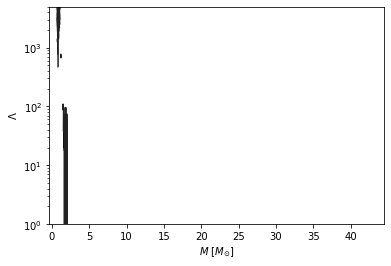

In [8]:
containerm1 = [None]*len(mbins)
containerm2 = [None]*len(mbins)
containerL1 = [None]*len(mbins)
containerL2 = [None]*len(mbins)
containerm = [None]*len(mbins)
containerL = [None]*len(mbins)
for j in range(len(mbins)):
    containerm[j], containerL[j] = [], []

for i in range(npop):
    
    data = np.genfromtxt('./dat/zeronoise_{1}_unif_BNS_DBHF2010/BNS_{0}.csv'.format(i,SCENARIO+SCENARIOTAG),names=True,dtype=None,delimiter=',')
    
    m1s = data['m1']
    m2s = data['m2']
    L1s = data['Lambda1']
    L2s = data['Lambda2']
    
    for j in range(len(mbins)):
        
        #if np.digitize(np.mean(m1s),mbins) == j: containerm1[j] = m1s
    
        if np.digitize(np.mean(m1s),mbins) == j:
            containerm1[j] = m1s
            containerL1[j] = L1s
            containerm[j] += list(containerm1[j])
            containerL[j] += list(containerL1[j])
            
        if np.digitize(np.mean(m2s),mbins) == j:
            containerm2[j] = m2s
            containerL2[j] = L2s
            containerm[j] += list(containerm2[j])
            containerL[j] += list(containerL2[j])      
    
    sns.kdeplot(m1s,L1s,color='k',levels=[0.1,0.5])
    sns.kdeplot(m2s,L2s,color='k',levels=[0.1,0.5])

plt.yscale('log')
plt.ylim(1.,5e3)

plt.xlabel(r'$M$ [$M_\mathrm{\odot}$]')
plt.ylabel(r'$\Lambda$')
plt.show()

bin up to 1.0 Msun; 2.0 stars in bin


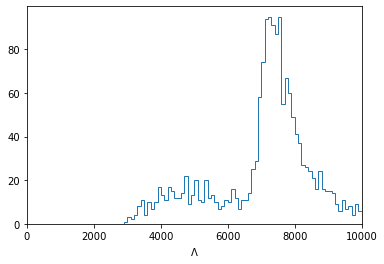

bin up to 1.1 Msun; 34.0 stars in bin


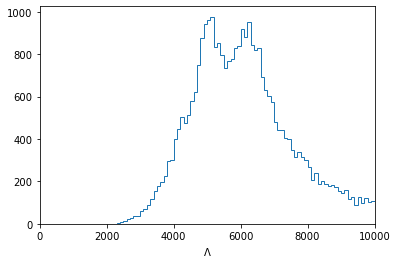

bin up to 1.2 Msun; 11.0 stars in bin


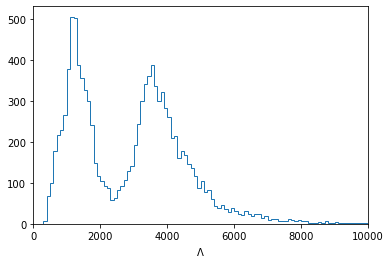

bin up to 1.3 Msun; 26.0 stars in bin


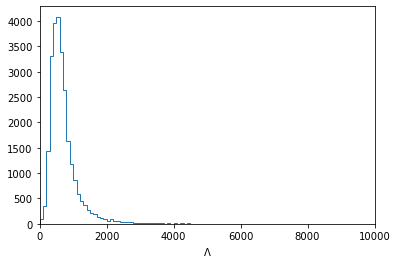

bin up to 1.4 Msun; 16.0 stars in bin


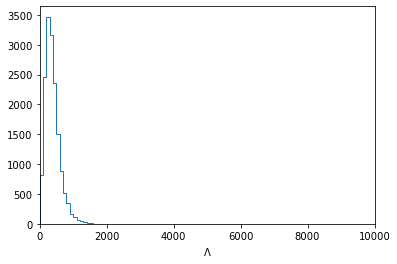

bin up to 1.5 Msun; 16.0 stars in bin


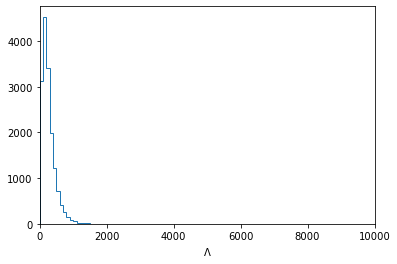

bin up to 1.6 Msun; 20.0 stars in bin


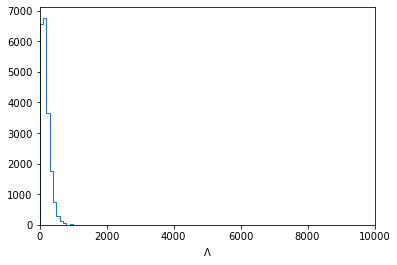

bin up to 1.7 Msun; 22.0 stars in bin


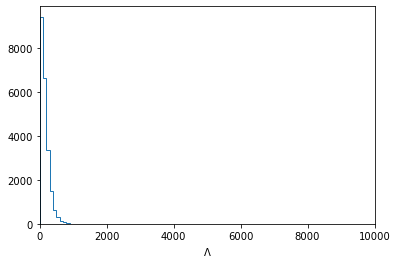

bin up to 1.7999999999999998 Msun; 19.0 stars in bin


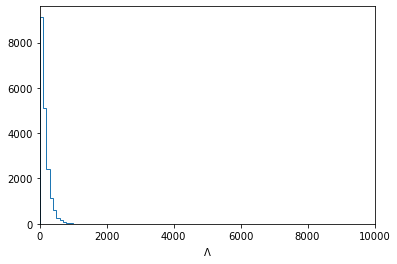

bin up to 1.9 Msun; 18.0 stars in bin


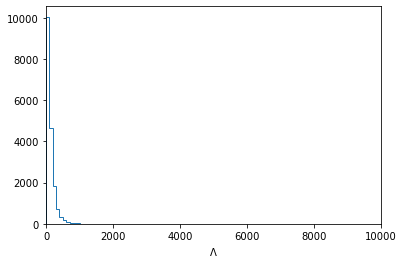

bin up to 2.0 Msun; 23.0 stars in bin


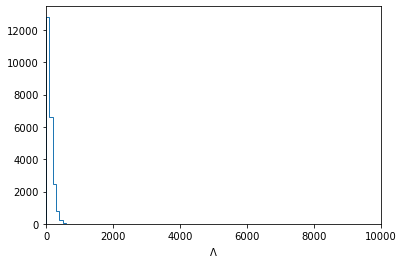

bin up to 2.0999999999999996 Msun; 7.0 stars in bin


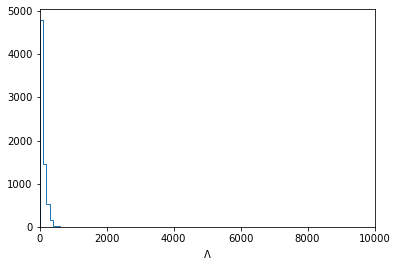

bin up to 2.2 Msun; 0.0 stars in bin


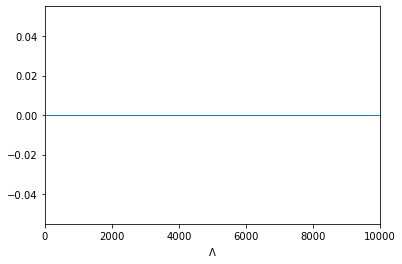

bin up to 2.3 Msun; 0.0 stars in bin


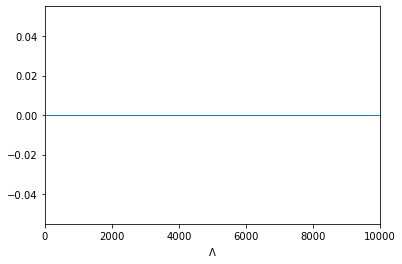

In [9]:
for j in range(len(mbins)):
    
    print('bin up to {0} Msun;'.format(mbins[j]),'{0} stars in bin'.format(len(containerL[j])/1000))
    plt.hist(containerL[j],bins=100,range=(0.,10000.),histtype='step')
    
    plt.xlim(0.,10000.)
    plt.xlabel(r'$\Lambda$')
    plt.show()